In [10]:
import pandas as pd
import numpy as np

# Read the csv to a dataframe
data = pd.read_csv('originaldata.csv',sep=",") 

/Users/Kaitlin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,6,7,8,9,10,16,17,18,19,20,21,22,26,27,28,29,109,110,113,114,116,117,118,119,120,121,123,124,128,134,137,138,139,140,141,142,143,148,154,159,160,162,163,164,165,168,169,170,171,173,174,297,298,299,303,304,305,306,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Cleaning

In [11]:
#See how the data looks
data.head()

,CASEID,V00232,V00233,V00234,V00240,V00241,V00242,V00243,V00244,V00245,...,V02611,V02625,V02624,V02626,V02627,V02807,V02614,V02616,V02617,V02620
0,1,3,3,3,,,,,,,...,1,2,,5,,5,5,5,5,5
1,2,3,3,1,,,,,,,...,0,1,,,,5,5,5,5,5
2,3,3,3,2,,,,,,,...,1,2,,5,,1,5,5,5,5
3,4,2,2,1,,,,,,,...,3,2,,5,,5,5,5,5,5
4,5,3,1,1,,,,,,,...,1,2,,5,,5,5,5,5,5


In [12]:
#regular expression to replace blank values with nan
data.replace(r'^\s*$', np.nan, regex=True,inplace=True)

In [13]:
data.head()

,CASEID,V00232,V00233,V00234,V00240,V00241,V00242,V00243,V00244,V00245,...,V02611,V02625,V02624,V02626,V02627,V02807,V02614,V02616,V02617,V02620
0,1,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,NaN,5,NaN,5,5,5,5,5
1,2,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,5,5,5,5,5
2,3,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,NaN,5,NaN,1,5,5,5,5
3,4,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,NaN,5,NaN,5,5,5,5,5
4,5,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,NaN,5,NaN,5,5,5,5,5


In [14]:
data.shape

(20013, 308)

In [15]:
#remove rows where medication effectiveness and medication recieved is NaN
data.dropna(subset = ["V02509"],inplace=True)
data.dropna(subset = ["V02751"],inplace=True)

In [16]:
data.shape

(2793, 308)

In [17]:
#Only keep columns with >=80% non NaN values
data.dropna(axis=1,thresh=2234,inplace=True)

In [18]:
data.shape

(2793, 55)

In [19]:
#Only keep rows with >=80% non NaN values
data.dropna(axis=0,thresh=45,inplace=True)

In [20]:
data.shape

(2676, 55)

In [21]:
#Function to dsiplay NaN counts of columns 
def display_nan_counts(my_df):
    Nan_count = my_df.isna().sum()
    print(Nan_count[Nan_count > 1])

In [22]:
display_nan_counts(data)

V00232    320
V00239    320
V00252    320
V00253    320
V00254    320
V00255    320
V00256    320
V00257    320
V00683    320
V00706    437
V00707    469
V02632    458
V02633    458
V02635    458
V02637    458
V02640      6
V02765    378
V02766    378
dtype: int64


In [23]:
#Drop V00683 (interview checkpoint)
data.drop('V00683',axis=1,inplace=True)

In [24]:
#Drop V00253 - V00256 as they can be inferred by V00257.
data.drop('V00253',axis=1,inplace=True)

In [25]:
data.drop('V00254',axis=1,inplace=True)

In [26]:
data.drop('V00255',axis=1,inplace=True)

In [27]:
data.drop('V00256',axis=1,inplace=True)

In [28]:
#Determine values for filling NaN in variables where median is reasonable and fill
data['V00232'] = data['V00232'].fillna(data['V00232'].median())

In [29]:
data['V00239'] = data['V00239'].fillna(data['V00239'].median())

In [30]:
#The remaining NaN values will be filled in with -8 ("Don't Know" in codebook)
data.update(data[['V00252','V00257','V00706','V00707','V02632','V02633','V02635','V02637','V02640','V02765','V02766']].fillna(-8))

In [31]:
#ensure all NaNs dealt with 
display_nan_counts(data)

Series([], dtype: int64)


In [32]:
#There two indices, drop one. 
data.drop('CASEID', axis=1,inplace=True)

In [33]:
data.reset_index(drop=True,inplace=True)

In [34]:
data.head().T

,0,1,2,3,4
V00232,3,3,1,3,3
V00239,0,0,0,0,24
V00252,5,5,5,5,5
V00257,5,5,5,5,1
V00684,1,5,1,1,5
V00685,1,5,5,5,5
V00686,5,5,5,5,5
V00690,1,5,1,1,1
V00691,1,5,5,1,1
V00692,1,1,1,1,1


In [39]:
data = data.apply(pd.to_numeric)

In [43]:
#The negative values in the data represent "I dont know" or missing responses for consistency I will code these values as 0

data[data<0]= 0

In [44]:
#Export clean data to csv.
data.to_csv('clean_capstone.csv',index_label=False)

# EDA

In [1]:
import pandas as pd
import numpy as np

# Read the csv to a dataframe
data = pd.read_csv('clean_capstone.csv',sep=",")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Check shape of data
data.shape

(2676, 49)

In [4]:
#Make sure data looks good
data.head()

,V00232,V00239,V00252,V00257,V00684,V00685,V00686,V00690,V00691,V00692,...,V02765,V02766,V02776,V02610,V02611,V02807,V02614,V02616,V02617,V02620
0,3.0,0.0,5,5,1,1,5,1,1,1,...,2,0,5,1,1,1,5,5,5,5
1,3.0,0.0,5,5,5,5,5,5,5,1,...,0,0,0,0,1,5,5,5,5,5
2,1.0,0.0,5,5,1,5,5,1,5,1,...,0,0,5,0,0,5,5,1,5,5
3,3.0,0.0,5,5,1,5,5,1,1,1,...,2,0,1,7,0,1,5,5,5,5
4,3.0,24.0,5,1,5,5,5,1,1,1,...,2,5,1,3,0,5,5,5,5,5


In [5]:
#Give columns more meaningful names 
data.columns =['smoker','days_limited_activities','learning_difficulty','ADL_difficulty','panic_attack','break_items','violent','sad_period','discouraged_period','uninterested_period','unusual_period','irritable_period','extremely_worried','fam_worried_smoking','fam_worried_drugsalc','problems_due_drugsalc','irresponsible_drugsalc','fear_animals','fear_weather','fear_hospinjuy','fear_closedspace','fear_heights','fear_plane','fear_socialsituations','fear_public','freq_trouble_child','rebel_child','sepanxiety_child','med_id','num_meds_month','num_meds_yr','med_first_time','day_took_recently','amount_taken_meddays','dosage_method','mg_dosage','reason_med','effectiveness_med','supervision_med','who_prescribed','days_forget_med','still_taking','different_kinds_med','non_prescribed_meds','sedative_12mnths','presc_antidep','presc_tranq','presc_amph','presc_antipsyc']

In [6]:
data.head().T

,0,1,2,3,4
smoker,3.0,3.0,1.0,3.0,3.0
days_limited_activities,0.0,0.0,0.0,0.0,24.0
learning_difficulty,5.0,5.0,5.0,5.0,5.0
ADL_difficulty,5.0,5.0,5.0,5.0,1.0
panic_attack,1.0,5.0,1.0,1.0,5.0
break_items,1.0,5.0,5.0,5.0,5.0
violent,5.0,5.0,5.0,5.0,5.0
sad_period,1.0,5.0,1.0,1.0,1.0
discouraged_period,1.0,5.0,5.0,1.0,1.0
uninterested_period,1.0,1.0,1.0,1.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2675
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   smoker                   2676 non-null   float64
 1   days_limited_activities  2676 non-null   float64
 2   learning_difficulty      2676 non-null   int64  
 3   ADL_difficulty           2676 non-null   int64  
 4   panic_attack             2676 non-null   int64  
 5   break_items              2676 non-null   int64  
 6   violent                  2676 non-null   int64  
 7   sad_period               2676 non-null   int64  
 8   discouraged_period       2676 non-null   int64  
 9   uninterested_period      2676 non-null   int64  
 10  unusual_period           2676 non-null   int64  
 11  irritable_period         2676 non-null   int64  
 12  extremely_worried        2676 non-null   int64  
 13  fam_worried_smoking      2676 non-null   int64  
 14  fam_worried_drugsalc    

In [8]:
#Change data type of smoker and days limited in activties to integer 
data=data.astype({"smoker": int, "days_limited_activities": int})


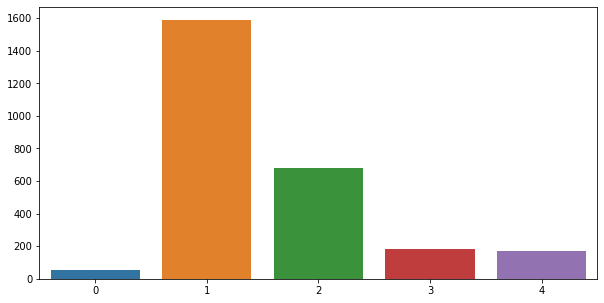

In [9]:
#Check distrubution of target (medication effectiveness)
success= data['effectiveness_med'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(success.index, success.values)
plt.show()

There seems to be 4 meaningful groups within our target variable. (-1 encodes "I don't know" responses)
- 1: very effective 
- 2: somewhat effective 
- 3: not very effective 
- 4: not at all effective 



In [10]:
data = data[data.effectiveness_med != 0]


In [11]:
#make sure we only have data for what we're interested in 
data['effectiveness_med'].value_counts()

1    1589
2     680
3     184
4     170
Name: effectiveness_med, dtype: int64

In [12]:
#I am only interested in medication success so I will classify these 4 groups as binary categories. If medication is 'very effective'it will be classified as succesful (1) otherwise it will be classified as unsucessful (0)
data['effectiveness_med'] = np.where(data['effectiveness_med']==1, 1, 0)

In [13]:
#check if target variable is now binary 
data['effectiveness_med'].value_counts()

1    1589
0    1034
Name: effectiveness_med, dtype: int64

In [14]:
#Change value for 997 reffering to "other" in medication ID to value of 216 so scale is better 
data["med_id"].replace({997: 216},inplace=True)

In [15]:
#Export data with binary columns to csv.
data.to_csv('data_model_capstone.csv',index_label=False)

In [16]:
#Create a function to see the likelihood of medication being successful 
def likelihood_success(df, col):
    
    # group by and count success, unsuccess, and total
    success_counts = df.groupby(col)['effectiveness_med'].sum()
    total_counts = df.groupby(col)['effectiveness_med'].count()
    unsuccessful_counts = total_counts - success_counts
    
    # calculate percent
    pct_success = success_counts/total_counts
    pct_unsuccessful = unsuccessful_counts/total_counts
    
    # plot
    plt.figure(figsize=(12, 7))
    plt.barh(pct_success.index, 
             pct_success.values, 
             label="Likelihood of success")
    plt.barh(pct_unsuccessful.index, 
             pct_unsuccessful.values, 
             left=pct_success.values, 
             label="Likelihood unsuccess")
    plt.xlim(0.0, 1.0)
    plt.title(col)
    plt.legend()
    plt.show()
    

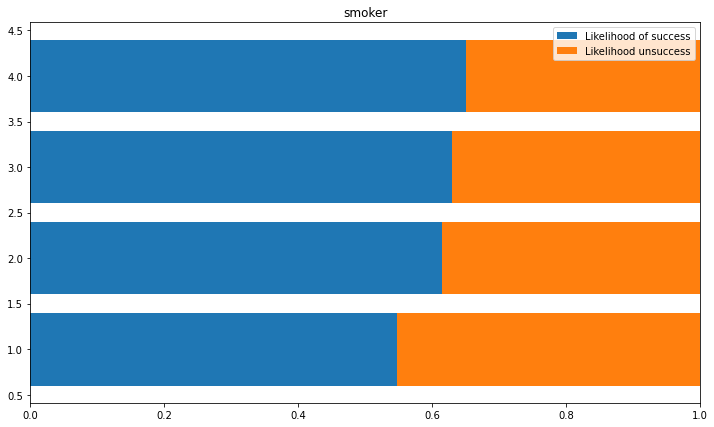

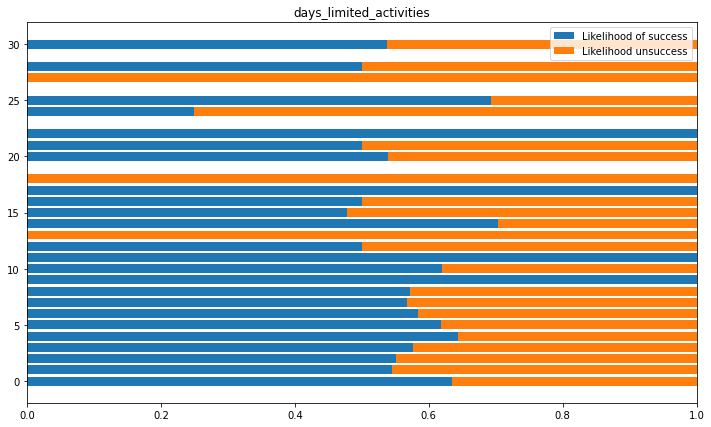

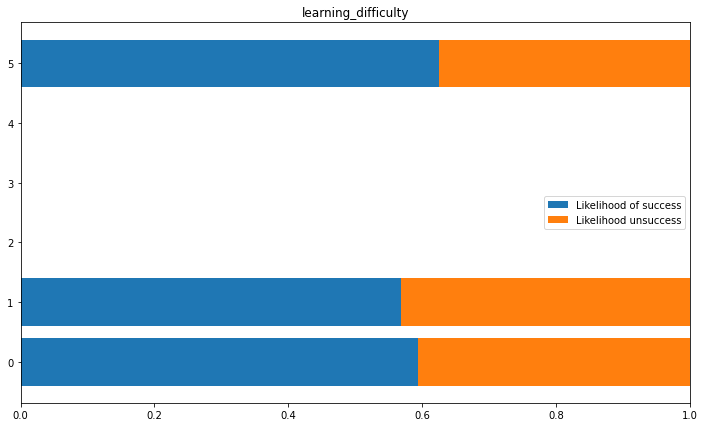

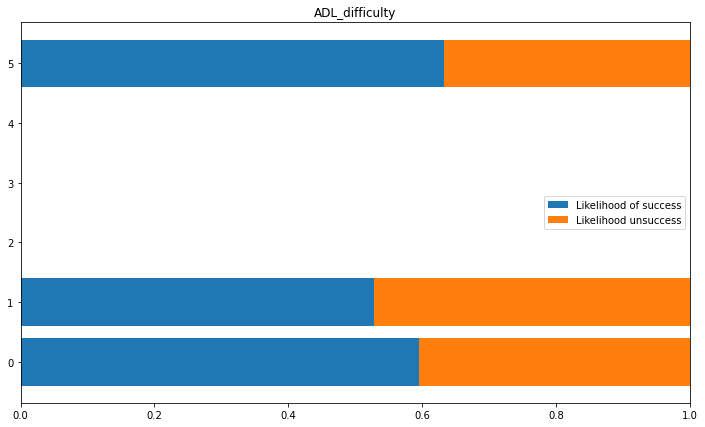

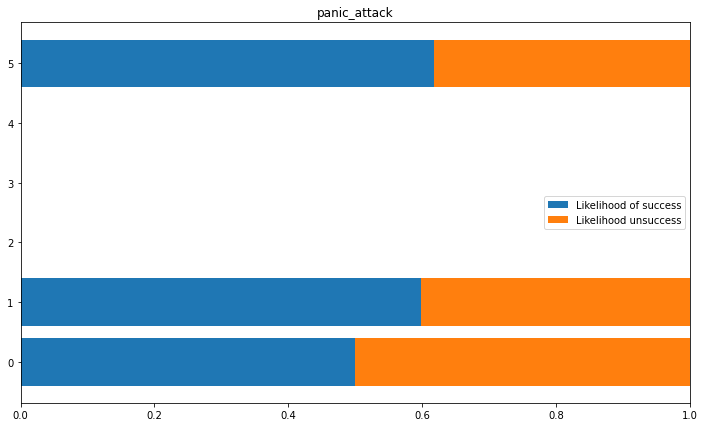

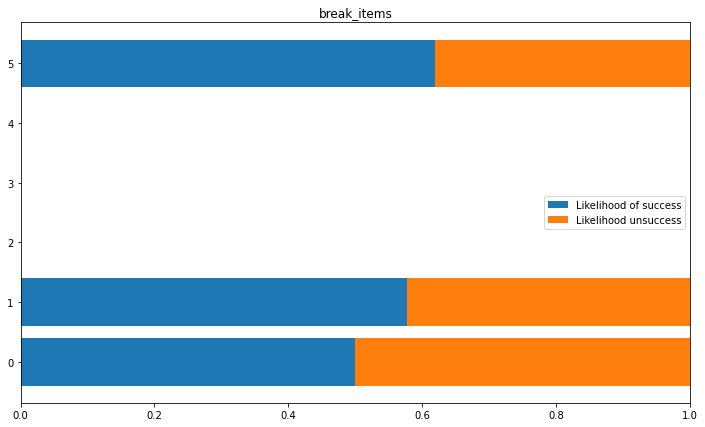

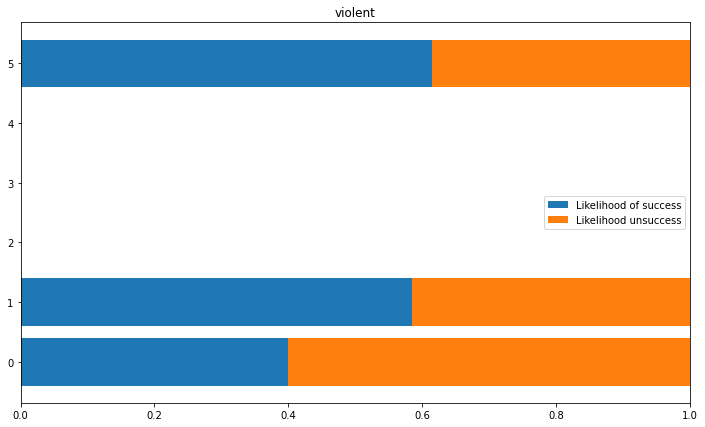

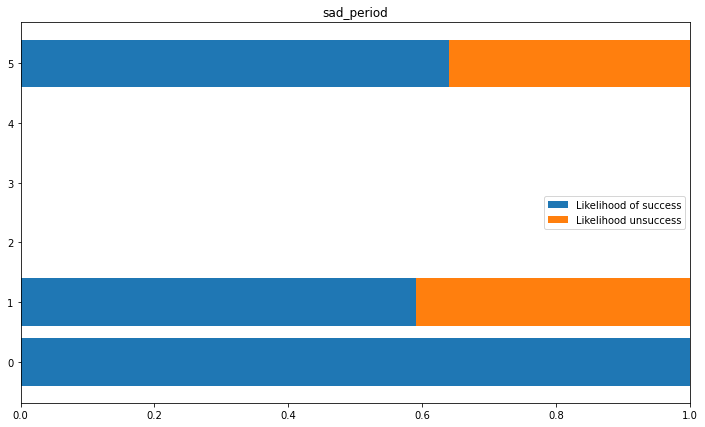

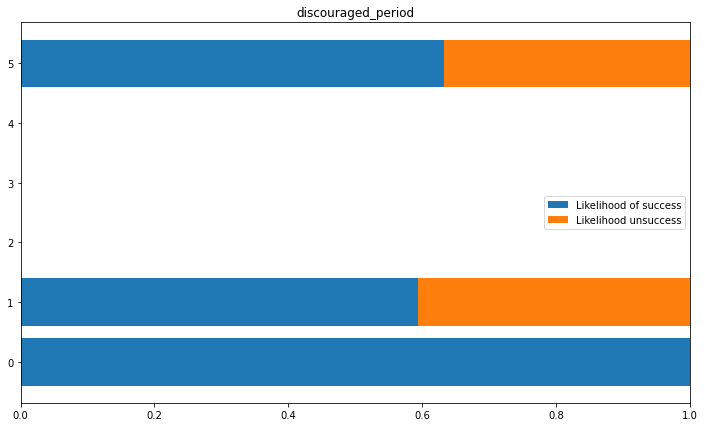

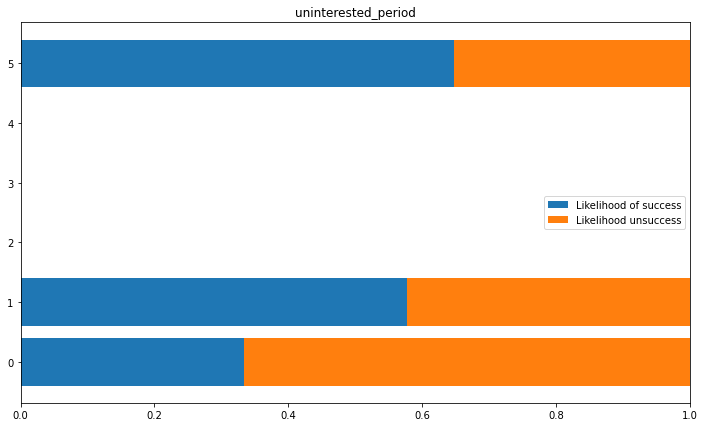

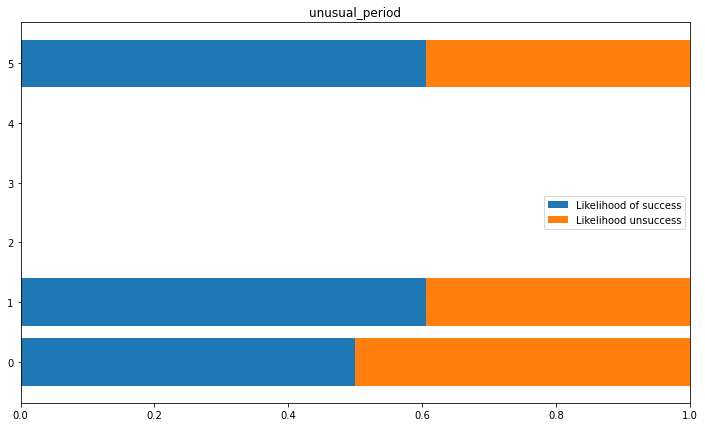

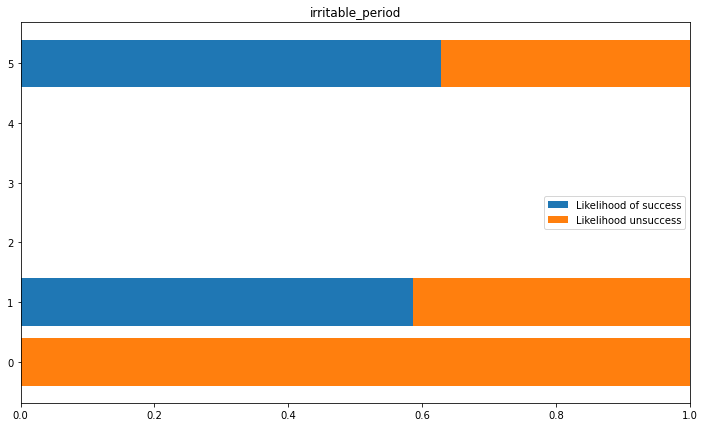

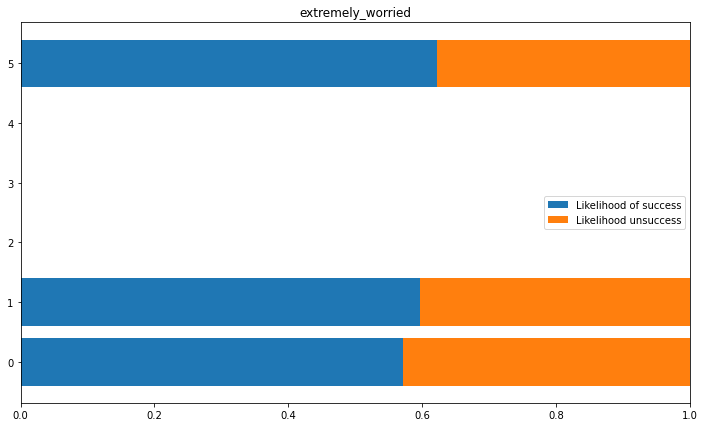

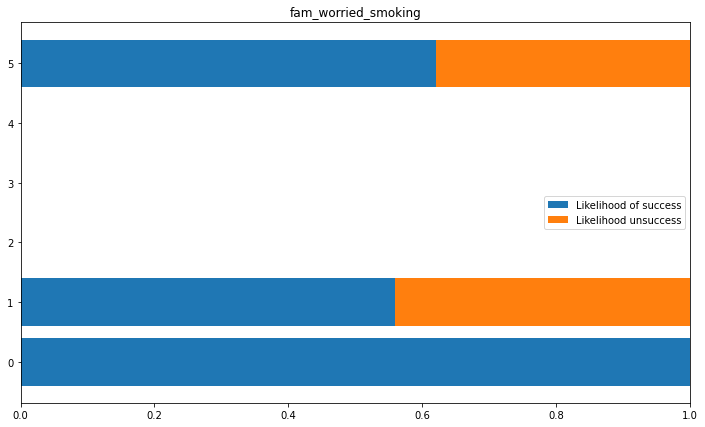

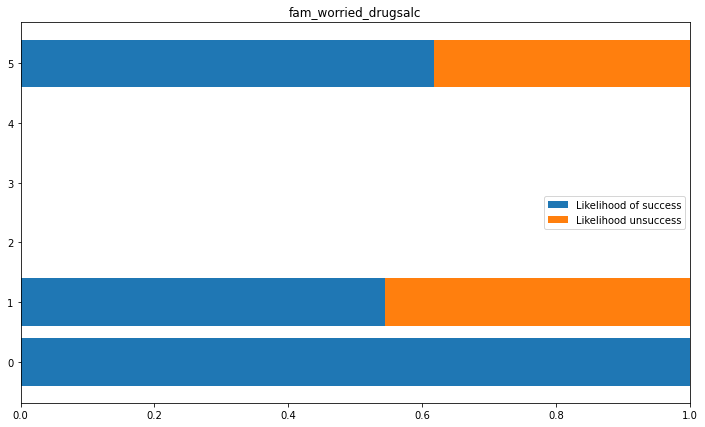

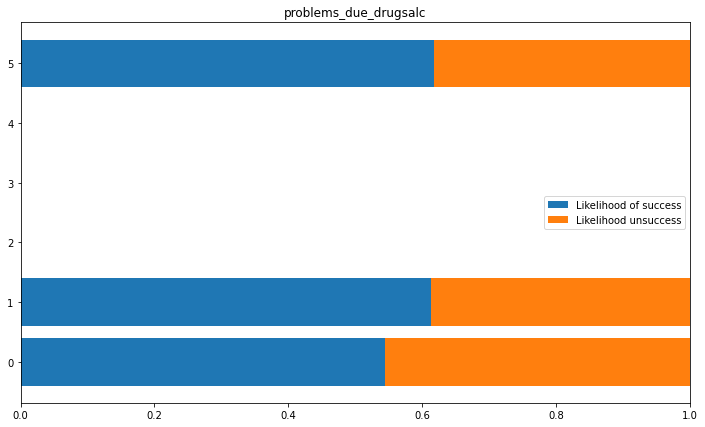

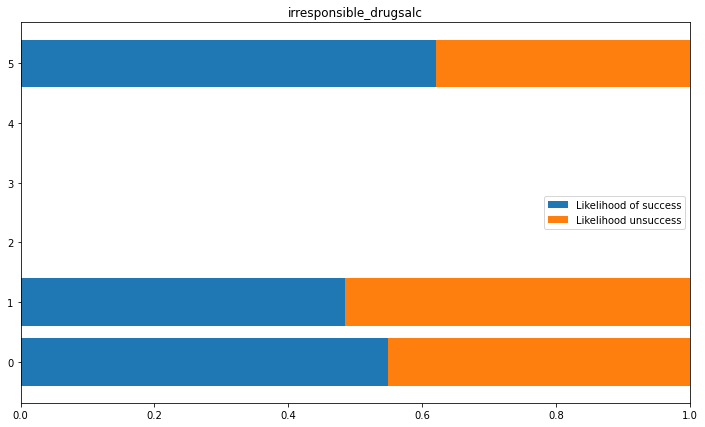

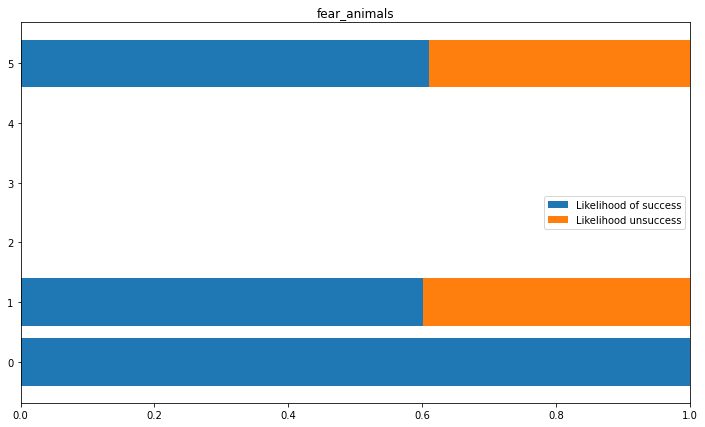

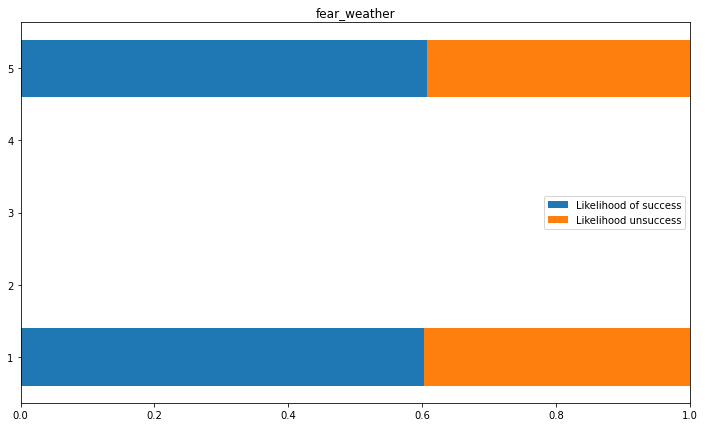

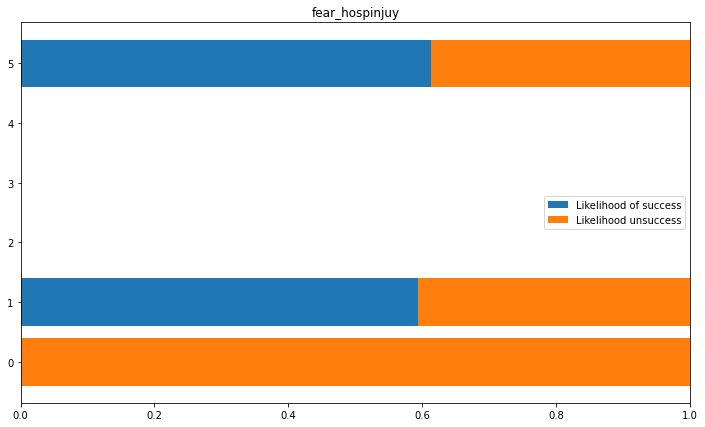

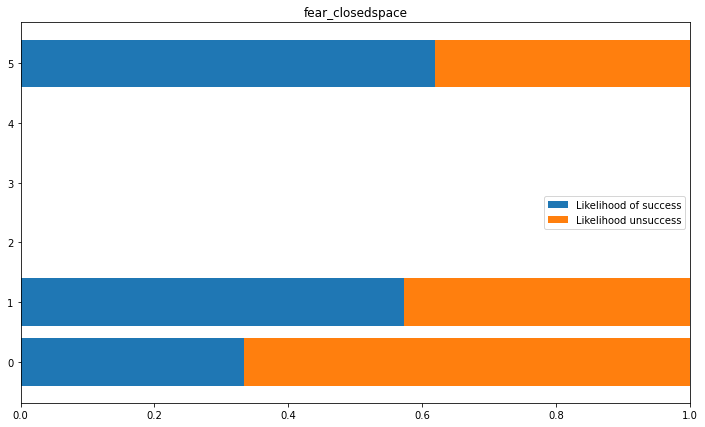

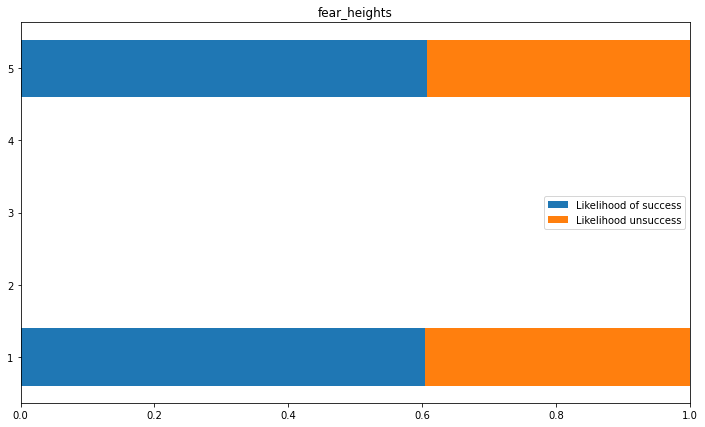

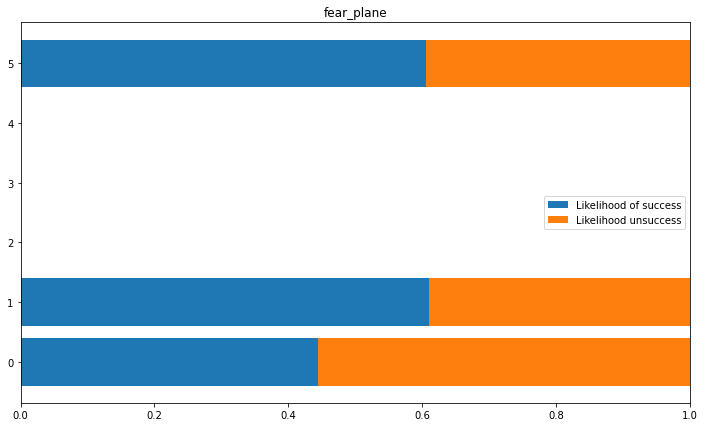

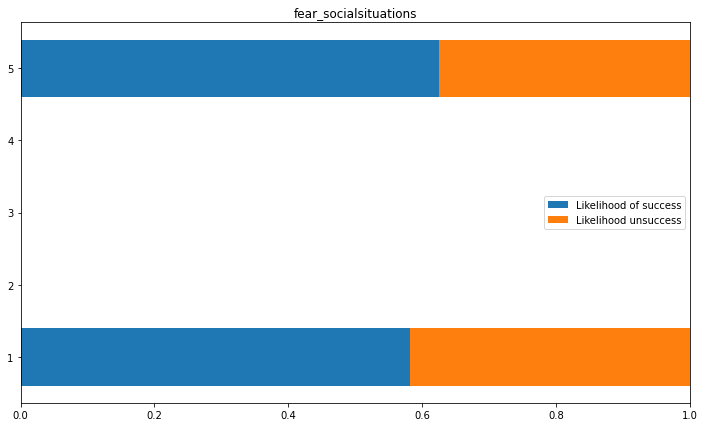

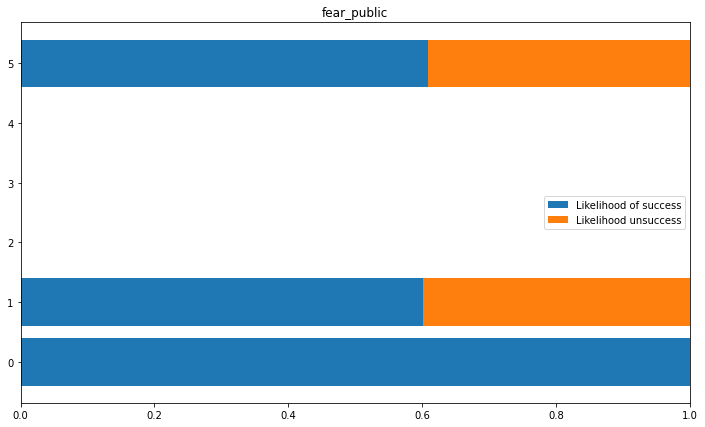

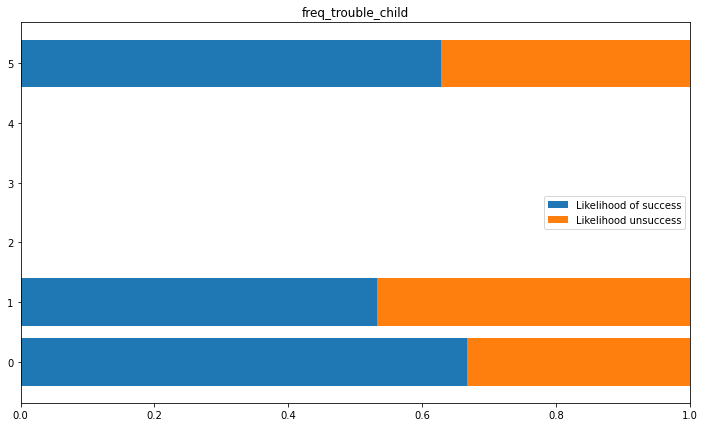

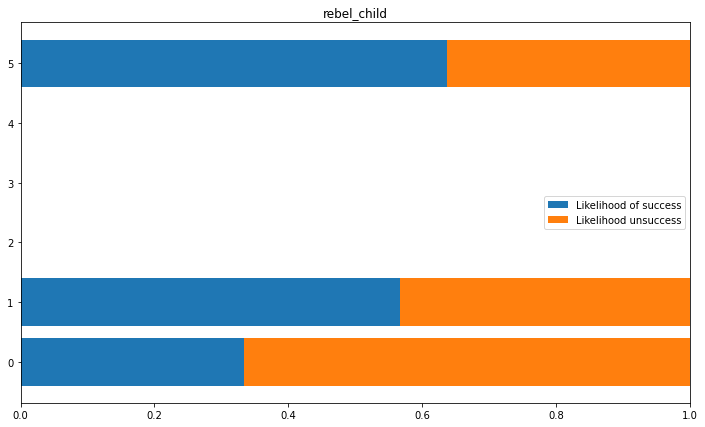

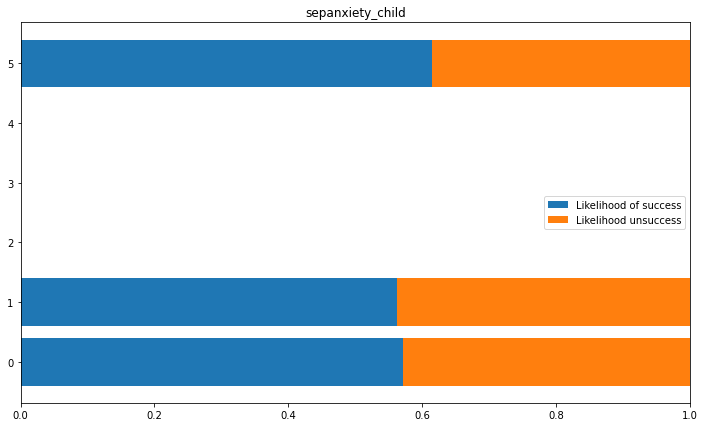

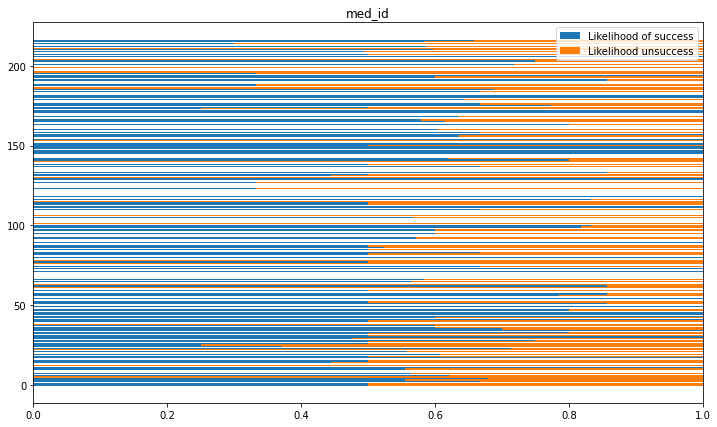

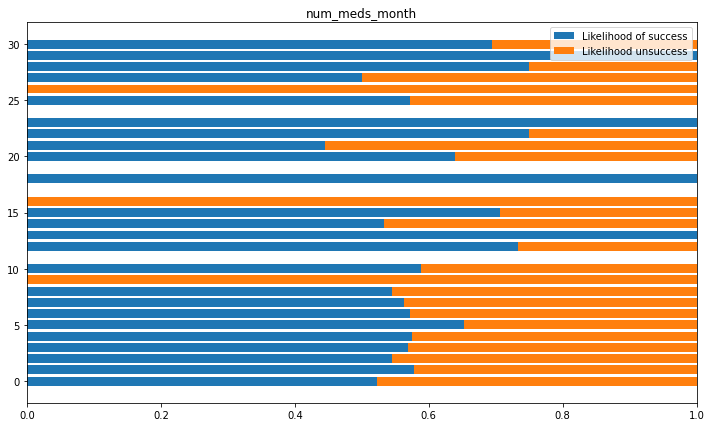

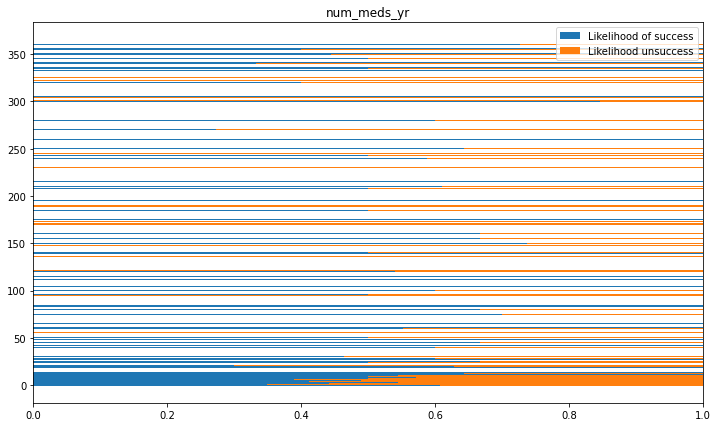

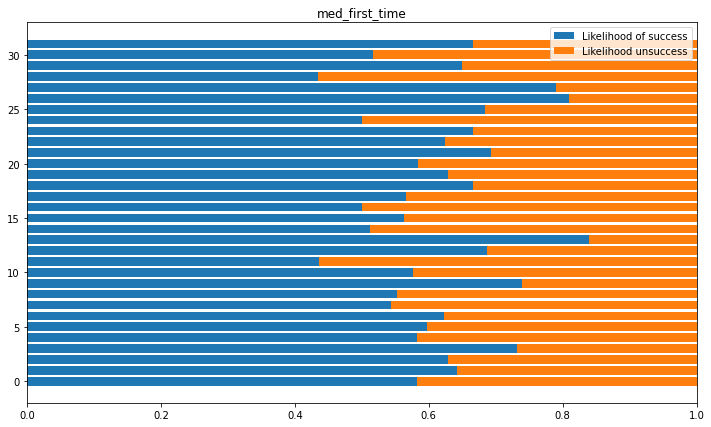

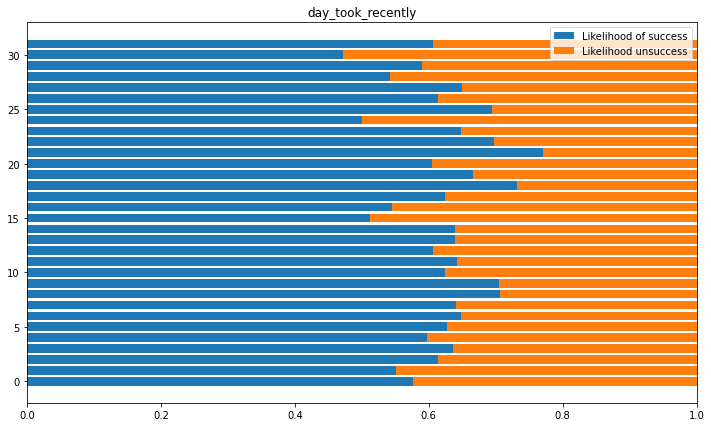

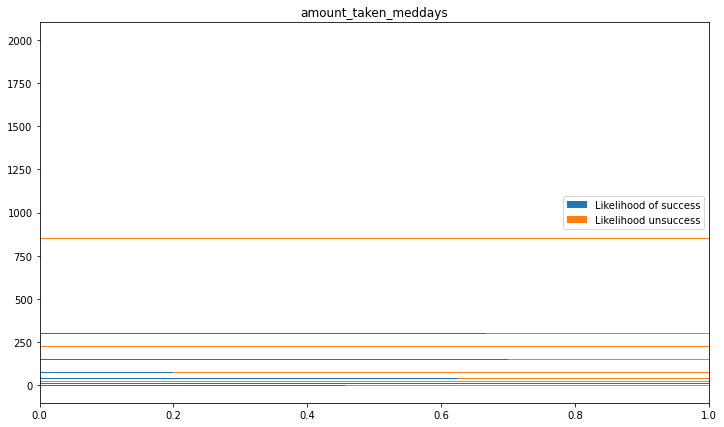

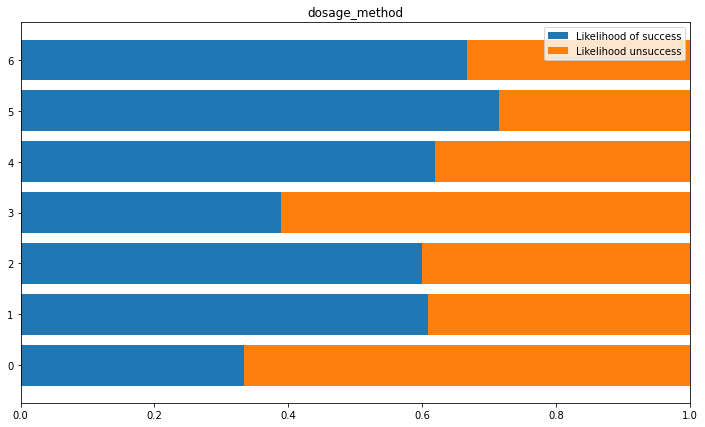

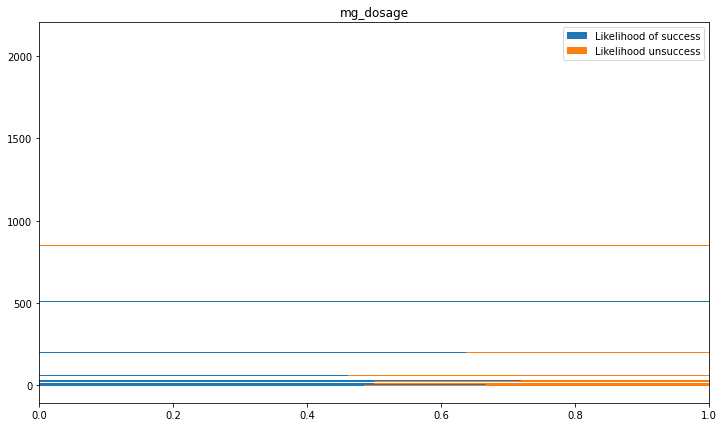

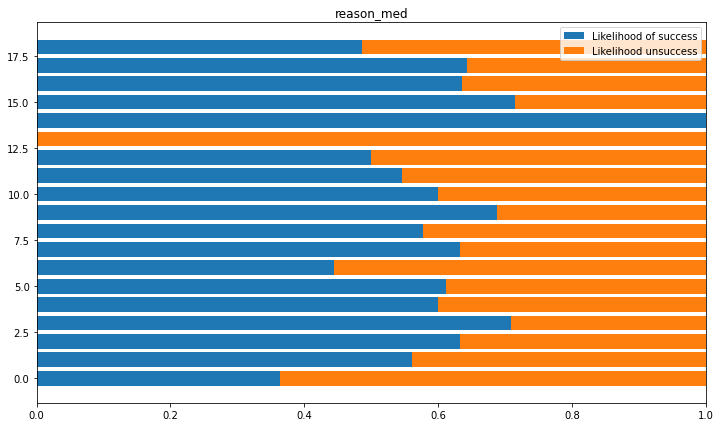

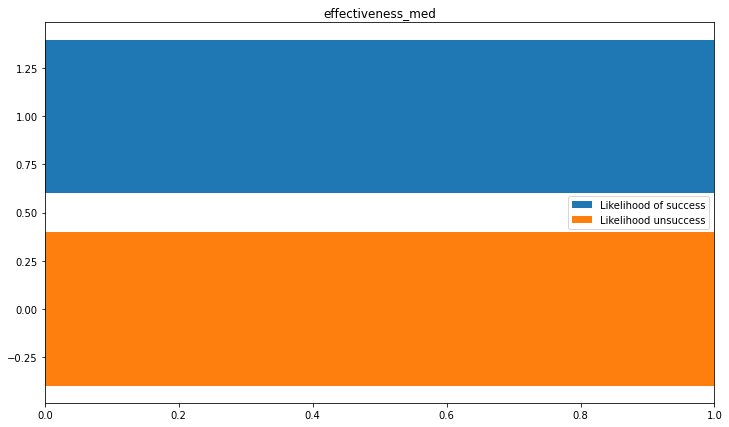

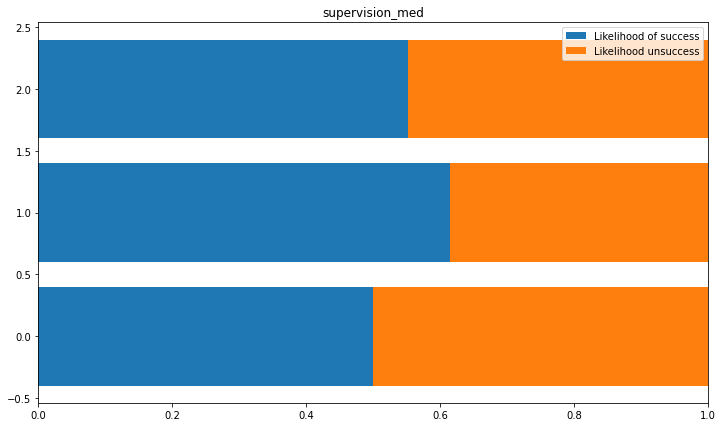

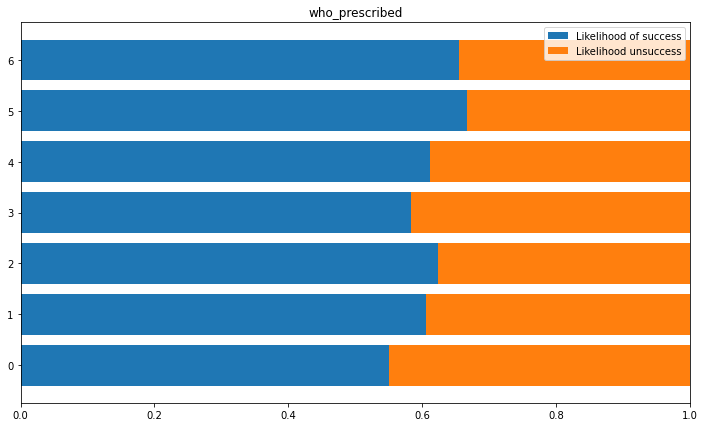

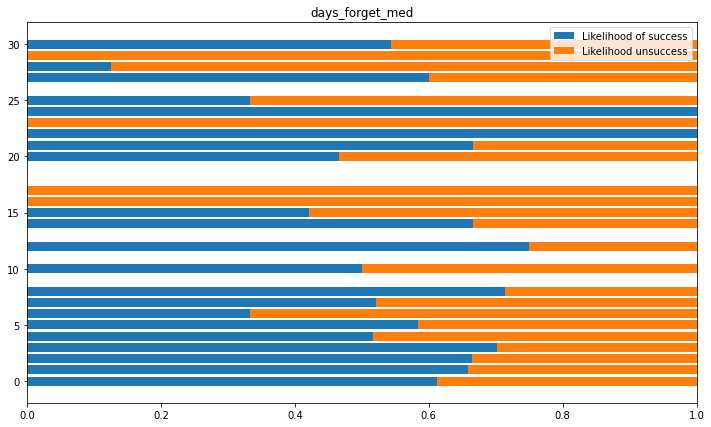

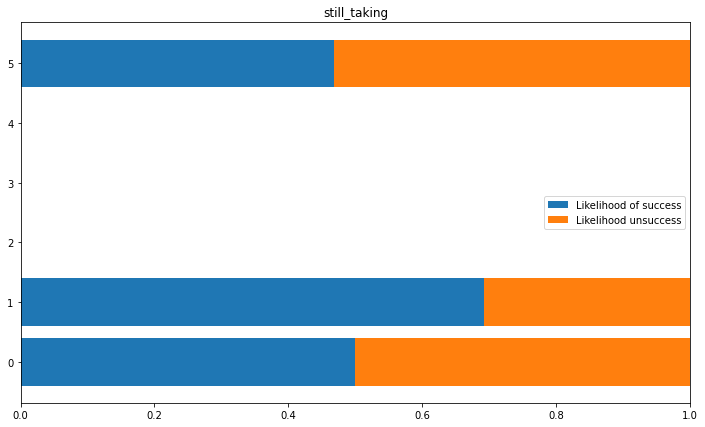

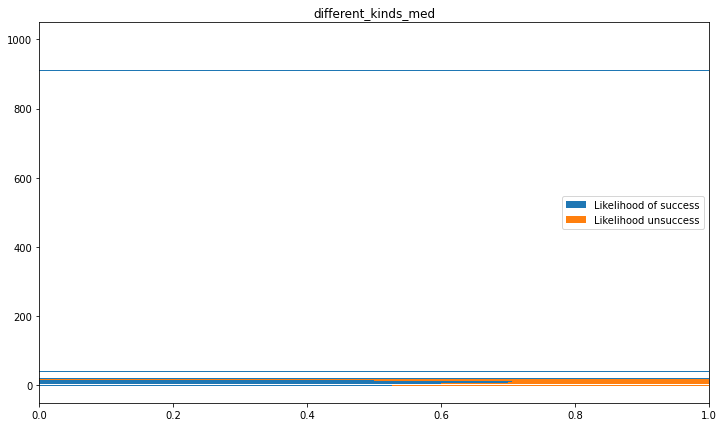

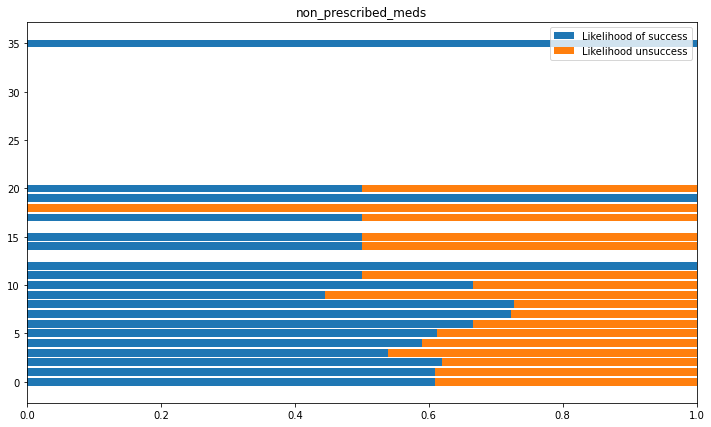

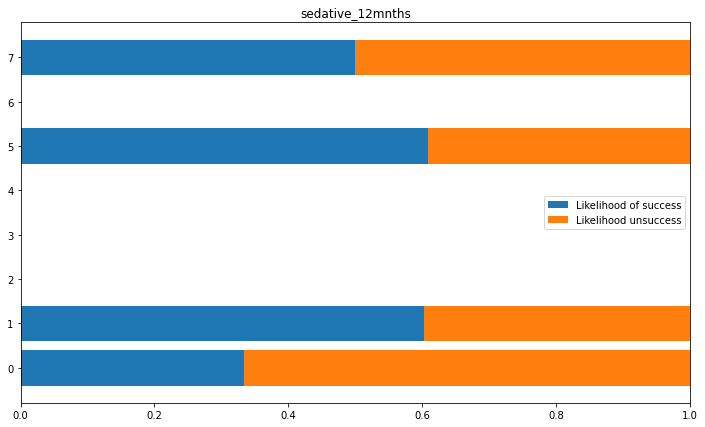

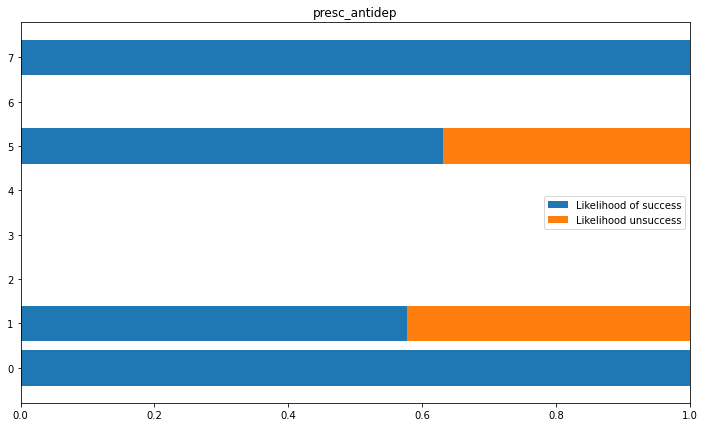

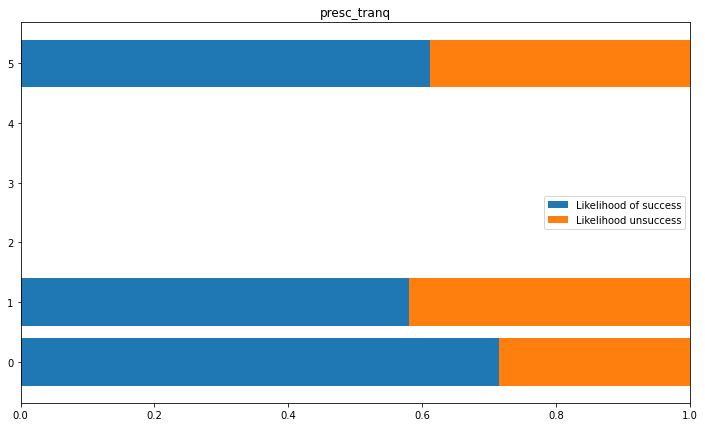

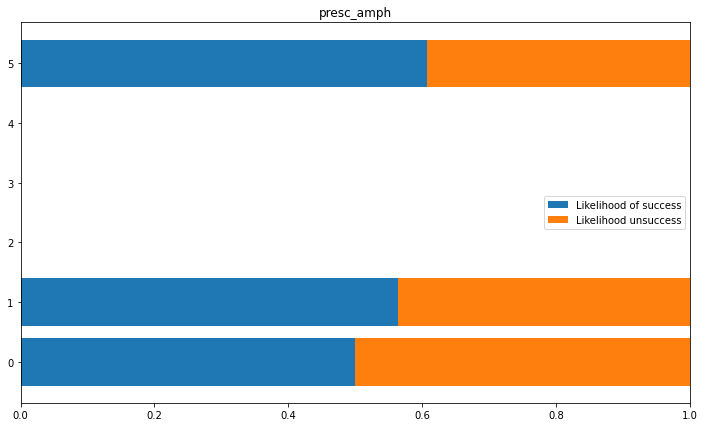

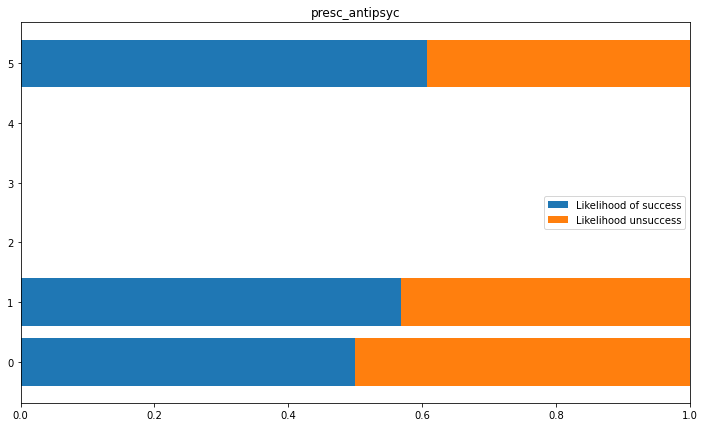

In [17]:
#Display medication likelihood plots for each column
for col in data.columns:
        likelihood_success(data, col)

        print()
        print()
        print()

# Basic Modeling

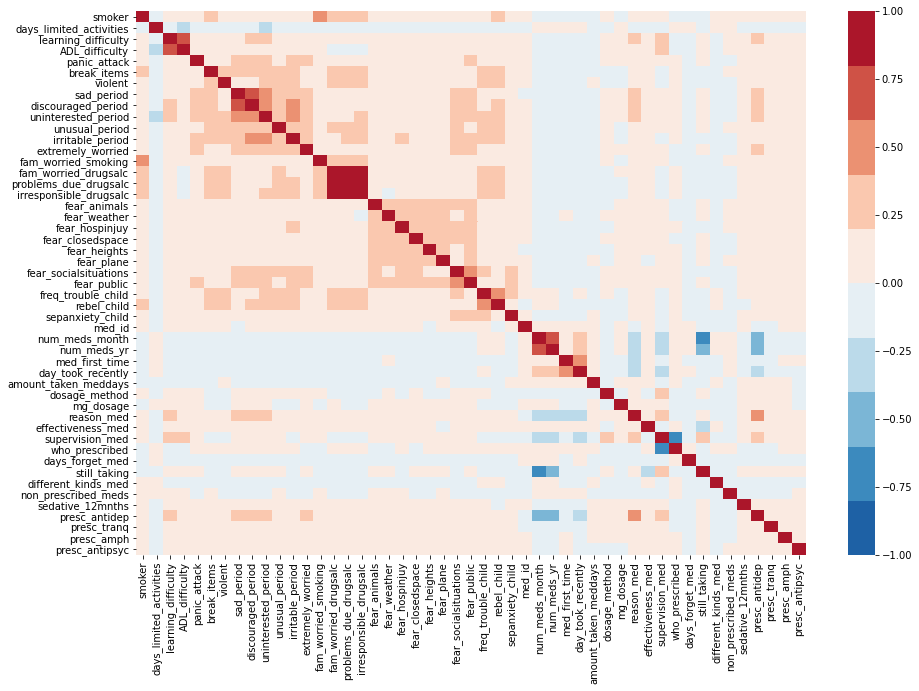

In [18]:
#Check correlation between variables
plt.figure(figsize=[15,10])
sns.heatmap(data.corr(), vmax=1.0, vmin=-1.0, cmap=sns.color_palette("RdBu_r", 10))
plt.show()

Seems like there is some correlation between variables I will keep this mind.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv to a dataframe
data = pd.read_csv('~/Desktop/Capstone finished work/data_model_capstone.csv',sep=",")

In [4]:
#display column names 
data.columns

Index(['smoker', 'days_limited_activities', 'learning_difficulty',
       'ADL_difficulty', 'panic_attack', 'break_items', 'violent',
       'sad_period', 'discouraged_period', 'uninterested_period',
       'unusual_period', 'irritable_period', 'extremely_worried',
       'fam_worried_smoking', 'fam_worried_drugsalc', 'problems_due_drugsalc',
       'irresponsible_drugsalc', 'fear_animals', 'fear_weather',
       'fear_hospinjuy', 'fear_closedspace', 'fear_heights', 'fear_plane',
       'fear_socialsituations', 'fear_public', 'freq_trouble_child',
       'rebel_child', 'sepanxiety_child', 'med_id', 'num_meds_month',
       'num_meds_yr', 'med_first_time', 'day_took_recently',
       'amount_taken_meddays', 'dosage_method', 'mg_dosage', 'reason_med',
       'effectiveness_med', 'supervision_med', 'who_prescribed',
       'days_forget_med', 'still_taking', 'different_kinds_med',
       'non_prescribed_meds', 'sedative_12mnths', 'presc_antidep',
       'presc_tranq', 'presc_amph', 'presc_

### Encode categorical columns that contain no natural order within categories to dummy variables

In [20]:
#create dummy variables for all categorical variables with no natrual order to them 
encoded= pd.get_dummies(data, columns = ['smoker','learning_difficulty','ADL_difficulty','panic_attack','break_items','violent','sad_period','discouraged_period','uninterested_period','unusual_period','irritable_period','extremely_worried','fam_worried_smoking','fam_worried_drugsalc','problems_due_drugsalc','irresponsible_drugsalc','fear_animals','fear_weather','fear_hospinjuy','fear_closedspace','fear_heights','fear_plane','fear_socialsituations','fear_public','freq_trouble_child','rebel_child','sepanxiety_child','dosage_method','reason_med','supervision_med','who_prescribed','still_taking','sedative_12mnths','presc_antidep','presc_tranq','presc_amph','presc_antipsyc'], prefix_sep = "_",drop_first = True)

In [21]:
encoded.head()

,days_limited_activities,med_id,num_meds_month,num_meds_yr,med_first_time,day_took_recently,amount_taken_meddays,mg_dosage,effectiveness_med,days_forget_med,...,sedative_12mnths_7,presc_antidep_1,presc_antidep_5,presc_antidep_7,presc_tranq_1,presc_tranq_5,presc_amph_1,presc_amph_5,presc_antipsyc_1,presc_antipsyc_5
0,0,6,0,14,1,1,2.0,5.0,0,0,...,0,0,1,0,0,1,0,1,0,1
2,0,21,1,2,13,17,0.5,0.0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,0,6,30,365,1,6,0.5,5.0,0,0,...,0,0,1,0,0,1,0,1,0,1
4,24,210,0,0,0,0,1.0,30.0,0,5,...,0,0,1,0,0,1,0,1,0,1
5,3,212,30,365,4,2,1.0,250.0,0,2,...,0,1,0,0,0,1,0,1,0,1


In [27]:
#Encode top 20 most occuring medications to dummy variables since the column has > 200 categories
encoded.med_id.value_counts().sort_values(ascending = False).head(20)

216    293
21     240
212    230
142    184
6      166
210    154
160    144
29      84
209     75
65      62
4       56
7       55
19      51
201     46
193     40
105     37
24      35
35      30
56      28
66      24
Name: med_id, dtype: int64

In [28]:
#create list of top 20 most occurring med
top_20_occurring_med = [med for med in encoded.med_id.value_counts().sort_values(ascending = False).head(20).index]

In [29]:
#make dummy variables for top 20 most occurring med in dataframe
for med in top_20_occurring_med:
    encoded[med] = np.where(encoded['med_id'] == med, 1, 0) 

In [30]:
encoded.head()

,days_limited_activities,med_id,num_meds_month,num_meds_yr,med_first_time,day_took_recently,amount_taken_meddays,mg_dosage,effectiveness_med,days_forget_med,...,4,7,19,201,193,105,24,35,56,66
0,0,6,0,14,1,1,2.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,21,1,2,13,17,0.5,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,6,30,365,1,6,0.5,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,210,0,0,0,0,1.0,30.0,0,5,...,0,0,0,0,0,0,0,0,0,0
5,3,212,30,365,4,2,1.0,250.0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Drop original med_id column 
data_new= encoded.drop('med_id', 1)

In [32]:
data_new.head()

,days_limited_activities,num_meds_month,num_meds_yr,med_first_time,day_took_recently,amount_taken_meddays,mg_dosage,effectiveness_med,days_forget_med,different_kinds_med,...,4,7,19,201,193,105,24,35,56,66
0,0,0,14,1,1,2.0,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,13,17,0.5,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,30,365,1,6,0.5,5.0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
4,24,0,0,0,0,1.0,30.0,0,5,3,...,0,0,0,0,0,0,0,0,0,0
5,3,30,365,4,2,1.0,250.0,0,2,4,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#export encoded data to csv 
data_new.to_csv('data_new_model.csv',index=False)

## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv to a dataframe
data = pd.read_csv('~/Desktop/Capstone finished work/data_new_model.csv')

In [2]:
data.head()

,days_limited_activities,num_meds_month,num_meds_yr,med_first_time,day_took_recently,amount_taken_meddays,mg_dosage,effectiveness_med,days_forget_med,different_kinds_med,...,4,7,19,201,193,105,24,35,56,66
0,0,0,14,1,1,2.0,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,13,17,0.5,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,30,365,1,6,0.5,5.0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
3,24,0,0,0,0,1.0,30.0,0,5,3,...,0,0,0,0,0,0,0,0,0,0
4,3,30,365,4,2,1.0,250.0,0,2,4,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Define X and y for the model 

X = data.drop(['effectiveness_med'], axis=1)
y = data['effectiveness_med'] 

#Split into train and test data 

from sklearn.model_selection import train_test_split
split = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split,stratify=y)

In [4]:
#Fit logistic regression with default parameters 
from sklearn.linear_model import LogisticRegression

# Instantaite model 
logistic_regression_model = LogisticRegression(solver='saga',max_iter=10000)

#Fit model 
logistic_regression_model.fit(X_train, y_train)

# Score on training data 
print(logistic_regression_model.score(X_train, y_train))

# Score on testing data
print(logistic_regression_model.score(X_test, y_test))

0.6468064823641564
0.6457142857142857


In [5]:
#Make a dataframe of coefficients 
coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",logistic_regression_model.coef_.transpose())

In [7]:
#top 20 factors of medication being unsuccessful 
coef_table.sort_values(by='Coefs', ascending=True).head(20)

,0,Coefs
95,still_taking_5,-0.142672
68,reason_med_1,-0.102861
99,presc_antidep_1,-0.097897
56,freq_trouble_child_1,-0.058296
27,uninterested_period_1,-0.053428
30,unusual_period_5,-0.052598
15,ADL_difficulty_1,-0.047373
23,sad_period_1,-0.041060
48,fear_closedspace_1,-0.040795
58,rebel_child_1,-0.035392


In [31]:
#top 20 factors of medication being successful 
coef_table.sort_values(by='Coefs', ascending=False).head(30)

,0,Coefs
94,still_taking_1,0.145409
100,presc_antidep_5,0.098513
16,ADL_difficulty_5,0.070824
57,freq_trouble_child_5,0.061244
28,uninterested_period_5,0.058842
29,unusual_period_1,0.053888
49,fear_closedspace_5,0.045463
89,who_prescribed_2,0.043528
108,216,0.043472
24,sad_period_5,0.042237


### Optimize Logistic Regression Parameters

In [13]:
#Create validation set from train 
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train)

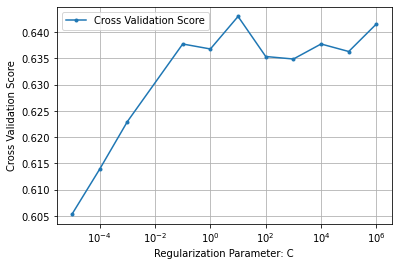

In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

#Store the results
cross_validation_scores = []

C_range = np.array([.00001,.0001,.001,.1,1,10,100,1000,10000,100000,1000000])

#Do cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c)
    
    # the cross validation score (mean of scores)
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5))
    
    cross_validation_scores.append(cv_score)
#plot results 
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

C=10 best 

In [18]:
#Fit logistic regression with optimized parameters 
from sklearn.linear_model import LogisticRegression

#Instantaite model 
logistic_regression_model = LogisticRegression(solver='saga',max_iter=10000, C=10)

#Fit model 
logistic_regression_model.fit(X_train, y_train)

# Score on training data 
print(logistic_regression_model.score(X_train, y_train))

# Score on testing data
print(logistic_regression_model.score(X_test, y_test))

0.6472831267874166
0.6457142857142857


In [19]:
#construct confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = logistic_regression_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 55, 152],
       [ 34, 284]])

In [20]:
#Precision 
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.6513761467889908

In [21]:
#Recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.8930817610062893

In [22]:
#F1 score 
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7533156498673739

## Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv to a dataframe
data = pd.read_csv('~/Desktop/KaitlinBustos_FinalCapstoneSubmission/Code/data_new_model.csv')

In [3]:
data.head()

,days_limited_activities,num_meds_month,num_meds_yr,med_first_time,day_took_recently,amount_taken_meddays,mg_dosage,effectiveness_med,days_forget_med,different_kinds_med,...,4,7,19,201,193,105,24,35,56,66
0,0,0,14,1,1,2.0,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,13,17,0.5,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,30,365,1,6,0.5,5.0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
3,24,0,0,0,0,1.0,30.0,0,5,3,...,0,0,0,0,0,0,0,0,0,0
4,3,30,365,4,2,1.0,250.0,0,2,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Define X and y for the model 

X = data.drop(['effectiveness_med'], axis=1)
y = data['effectiveness_med'] 

#Split into train and test data 

from sklearn.model_selection import train_test_split
split = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split,stratify=y)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

1.0
0.6361904761904762


### Optimize Parameters

In [8]:
# 5 fold cross validation for number of estimators 
from sklearn.model_selection import cross_val_score

cv_scores = []

for n in range(1,100):
    rf = RandomForestClassifier(n_estimators = n)
    
    cv_score = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
    cv_scores.append(cv_score)

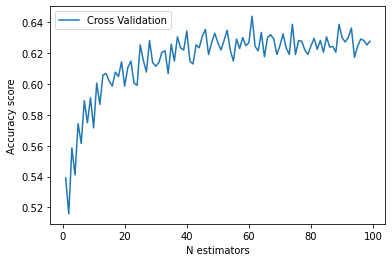

In [9]:
#plot result from cross validation
plt.figure()
plt.plot(range(1,100), cv_scores, label="Cross Validation")
plt.xlabel('N estimators')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

In [10]:
# pick N estimators with highest accuracy score 
n = range(1,100)[np.argmax(cv_scores)]
print(f"The best performance using using cross validation is: {n} estimators")

The best performance using using cross validation is: 61 estimators


In [12]:
# 5 fold cross validation for max depth  
cv_scores = []

for d in range(1,100):
    rf = RandomForestClassifier(n_estimators = 61, max_depth=d)
    
    cv_score = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
    cv_scores.append(cv_score)

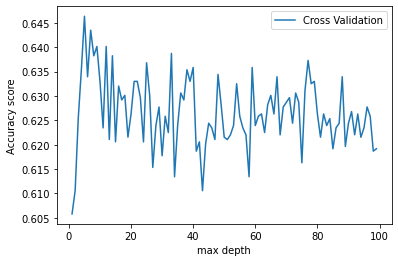

In [13]:
#plot result from cross validation
plt.figure()
plt.plot(range(1,100), cv_scores, label="Cross Validation")
plt.xlabel('max depth')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

In [14]:
# pick max depth with highest accuracy score 
d = range(1,100)[np.argmax(cv_scores)]
print(f"The best performance using using cross validation is: max_depth= {d} ")

The best performance using using cross validation is: max_depth= 5 


In [56]:
#Fit random forest with optimizaed parameters
rf = RandomForestClassifier(n_estimators=61,max_depth=5)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.7044804575786463
0.6476190476190476


In [57]:
#save model 
import joblib 
joblib.dump(rf, 'randomforest_Capstone.pkl') 
rf_from_joblib = joblib.load('randomforest_Capstone.pkl') 

In [60]:
#construct confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 51, 156],
       [ 29, 289]])

In [61]:
#print F1 score 
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7575360419397118

In [63]:
from sklearn.metrics import recall_score
#Explore recall scores for each class across various thresholds

#Get the probability for each point in the test set.
y_proba = rf.fit(X_train, y_train).predict_proba(X_test)[:,1]
thresholds = np.linspace(0, 1, 100)


# Iterate over the thresholds and compute the positive and negative recall
recalls = list()
neg_recalls = list()

thresholds = np.linspace(0, 1, 50)
for threshold in thresholds:
    
    # Apply the cutoff and calculate the positive and negative recall
    y_pred = np.where(y_proba > threshold, 1, 0)
    recall = recall_score(y_test, y_pred)
    neg_recall = recall_score(1-y_test, 1-y_pred)
    
    recalls.append(recall)
    neg_recalls.append(neg_recall)

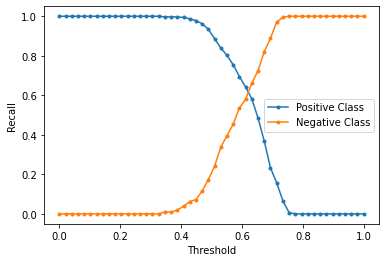

In [64]:
plt.figure()
plt.plot(thresholds, recalls, label='Positive Class', marker='.')
plt.plot(thresholds, neg_recalls, label='Negative Class', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [113]:
#Adjust y threshold to increase precision score since cost of false positives is high 
from sklearn.metrics import precision_score
y_threshold = np.where(y_proba > 0.59, 1, 0)
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Precision score: 0.6990595611285266
Recall score: 0.7012578616352201


In [114]:
#Look at confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)

confusion_matrix(y_test, y_threshold)

array([[111,  96],
       [ 95, 223]])

In [115]:
#f1 score 
from sklearn.metrics import f1_score

f1_score(y_test, y_threshold)

0.7001569858712715

In [ ]:
#Construct predictions for first 10 indiviuals in dataset 
datapred=data.head(10)

for i in range(len(datapred)) :
    if y_threshold[i] == 1 :
        print("Model Predicts:" "patient will be approved.")
    else :
        print("Model Predicts:""Medication will NOT be successful for patient.")
        

# Statistics

In [10]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm #used for plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('~/Desktop/Capstone finished work/data_model_capstone.csv')

In [3]:
data.head()

,smoker,days_limited_activities,learning_difficulty,ADL_difficulty,panic_attack,break_items,violent,sad_period,discouraged_period,uninterested_period,...,who_prescribed,days_forget_med,still_taking,different_kinds_med,non_prescribed_meds,sedative_12mnths,presc_antidep,presc_tranq,presc_amph,presc_antipsyc
0,3,0,5,5,1,1,5,1,1,1,...,2,0,5,1,1,1,5,5,5,5
2,1,0,5,5,1,5,5,1,5,1,...,0,0,5,0,0,5,5,1,5,5
3,3,0,5,5,1,5,5,1,1,1,...,2,0,1,7,0,1,5,5,5,5
4,3,24,5,1,5,5,5,1,1,1,...,2,5,1,3,0,5,5,5,5,5
5,2,3,5,5,1,5,5,1,1,1,...,1,2,1,4,0,1,1,5,5,5


In [7]:
#Data exported with index to get read into tableau to determine values used below 
data.to_csv('tableau_data.csv')

### Chi Sqaured Tests

$H_0$: There is no relationship between recieving an antidepressant and medication success.

$H_1$: There is _some_ relationship between the recieving an antidepressant and medication success. 

In [13]:
#Construct dataframe with frequencies
antidep = {'Antidep': [710,520], 'Other':[877,514]}

df_antidep = pd.DataFrame(antidep, index=['Successful', 'Unsuccessful'])
display(df_antidep)

,Antidep,Other
Successful,710,877
Unsuccessful,520,514


In [14]:
#Results for chi squared test
stats.chi2_contingency(df_antidep)

(7.526419489620606,
 0.006080062756749702,
 1,
 array([[744.75772606, 842.24227394],
        [485.24227394, 548.75772606]]))


__Conclusion:__ With a p-value of 0.006, we can reject the null hypothesis that there is no relationship between recieving an antidepressant and medication success. It appears that there is some relationship between medication success and whether an individual is prescribed an antidepressant vs other medication





  

$H_0$: There is no relationship between days limited in activities and medication success 

$H_1$: There is _some_ relationship between days limited in activities and medication success

In [42]:
#Construct dataframe with frequencies
adl = {'>15': [157,139],'<15':[1432,895]}

df_adl = pd.DataFrame(adl, index=['Successful', 'Unsuccessful'])
display(df_adl)

,>15,<15
Successful,157,1432
Unsuccessful,139,895


In [43]:
#Results for chi squared test
stats.chi2_contingency(df_adl)

(7.58899447487015,
 0.005872569537237829,
 1,
 array([[ 179.31528784, 1409.68471216],
        [ 116.68471216,  917.31528784]]))

__Conclusion:__ With a p-value of 0.0059, we can reject the null hypothesis that there is no relationship between days limited in activites and medication success. It appears that there is a relationship between medication success and how many days limited in ADL


$H_0$: There is no relationship between individuals still taking medication and medication success 

$H_1$: There is _some_ relationship between individuals still taking medication and medication success

In [45]:
#Construct dataframe with frequencies
taking = {'Still taking': [1116,498],'Ceased':[470,533]}

df_taking = pd.DataFrame(taking, index=['Successful', 'Unsuccessful'])
display(df_taking)

,Still taking,Ceased
Successful,1116,470
Unsuccessful,498,533


In [46]:
#Results for chi squared test
stats.chi2_contingency(df_taking)

(127.74306810287533,
 1.277558955733496e-29,
 1,
 array([[978.1444402, 607.8555598],
        [635.8555598, 395.1444402]]))

__Conclusion:__ With a p-value of 0.0059, we can reject the null hypothesis that there is no relationship between individuals still taking medication and medication success. It appears that there is a relationship between medication success and whether individuals are still taking medication.